In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel('ames_housing_data.xlsx')
df

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


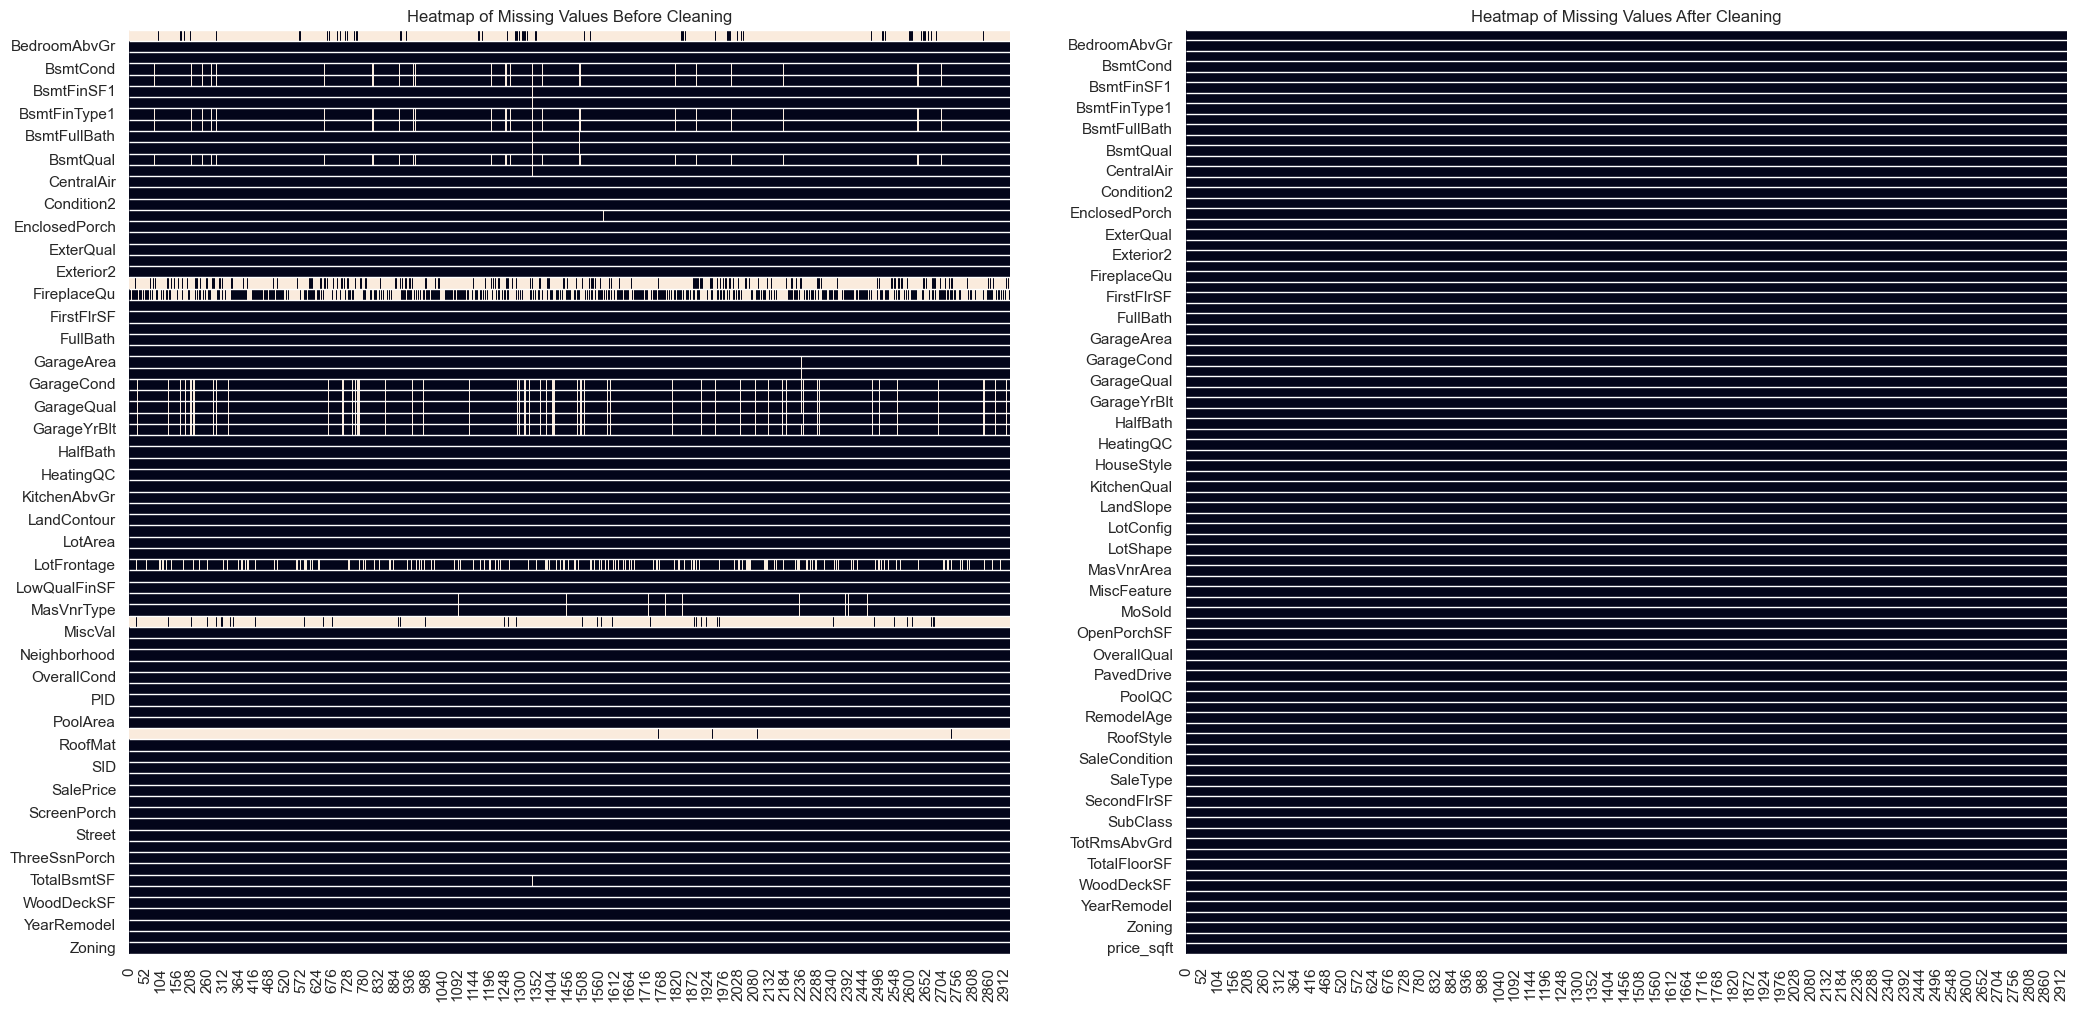

In [2]:
### Adding in code to clean the data.
import seaborn as sns
import matplotlib.pyplot as plt


## 
sns.set()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25, 12))

df_heat1=df.sort_index(axis=1, ascending=False)
sns.heatmap(df_heat1.T.isnull(), ax=ax1, cbar=False).invert_yaxis()
ax1.hlines(range(len(df_heat1)), *ax1.get_xlim(), color='white', linewidths=1)
ax1.vlines([], [], [])
ax1.set_title('Heatmap of Missing Values Before Cleaning')
plt.yticks(rotation = 360)
df['TotalFloorSF'] = df['FirstFlrSF'] + df['SecondFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['QualityIndex'] = df['OverallQual'] * df['OverallCond']
df['logSalePrice'] = np.log(df['SalePrice'])
df['price_sqft'] = df['SalePrice'] / df['TotalFloorSF']
Nulls=[]
for i in df.columns:
    if df[i].isnull().sum() > 0:
        Nulls.append(i)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())           
df['Alley']=df['Alley'].fillna('No alley')
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['RemodelAge']=df['YrSold']-df['YearRemodel']
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col].fillna('No basement')
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    if df[col].dtype == 'object':
        df[col]=df[col].fillna('No garage')
    else:
        df[col]=df[col].fillna('None')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageCars']=df['GarageCars'].fillna(0)
df['GarageArea']=df['GarageArea'].fillna(0)
df['PoolQC']=df['PoolQC'].fillna('No pool')
df['Fence']=df['Fence'].fillna('No fence')
df['MiscFeature']=df['MiscFeature'].fillna('No feature')
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna('No fireplace')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('No basement')
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col]=df[col].fillna(0)
df.to_csv('ames_housing_data.csv', index=False)
sns.set()
df_heat2=df.sort_index(axis=1, ascending=False)
sns.heatmap(df_heat2.T.isnull(), ax=ax2, cbar=False).invert_yaxis()
ax2.hlines(range(len(df_heat2)), *ax2.get_xlim(), color='white', linewidths=1)
ax2.set_title('Heatmap of Missing Values After Cleaning')
ax2.vlines([], [], [])
plt.yticks(rotation = 360)
plt.show()

In [3]:
import scipy

df.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

/var/folders/s2/q9mbkp214x35m1r7fqtd0d840000gn/T/ipykernel_3764/137861650.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
logSalePrice     1.000000
OverallQual      0.808800
TotalFloorSF     0.729936
GrLivArea        0.723342
GarageCars       0.701545
YearBuilt        0.680822
GarageArea       0.660475
FullBath         0.634161
GarageYrBlt      0.607554
TotalBsmtSF      0.606564
YearRemodel      0.601454
QualityIndex     0.587405
FirstFlrSF       0.581536
Fireplaces       0.526137
price_sqft       0.525801
TotRmsAbvGrd     0.499253
OpenPorchSF      0.479578
MasVnrArea       0.434773
LotArea          0.429249
LotFrontage      0.370670
WoodDeckSF       0.364185
HalfBath         0.333657
BsmtFinSF1       0.332543
BsmtFullBath     0.259356
SecondFlrSF      0.246861
BedroomAbvGr     0.196834
BsmtUnfSF        0.164116
ScreenPorch      0.092909
PoolArea         0.053570
MoSold           0.047163
ThreeSsnPorch    0.043784
SubClass         0.001973
YrSold          -0.021535
BsmtHalfBath    -0.029509
BsmtFinSF2      -0.033861
SID             -0.035703
MiscVal         -0.049764
LowQualFinSF

In [4]:
import scipy

df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

/var/folders/s2/q9mbkp214x35m1r7fqtd0d840000gn/T/ipykernel_3764/2695242030.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
logSalePrice     0.946303
OverallQual      0.799262
TotalFloorSF     0.713588
GrLivArea        0.706780
GarageCars       0.647562
GarageArea       0.640138
TotalBsmtSF      0.632529
FirstFlrSF       0.621676
price_sqft       0.613204
QualityIndex     0.560847
YearBuilt        0.558426
FullBath         0.545604
YearRemodel      0.532974
GarageYrBlt      0.508882
MasVnrArea       0.502196
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.433147
LotFrontage      0.340256
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.275823
SecondFlrSF      0.269373
LotArea          0.266549
BsmtUnfSF        0.183308
BedroomAbvGr     0.143913
ScreenPorch      0.112151
PoolArea         0.068403
MoSold           0.035259
ThreeSsnPorch    0.032225
BsmtFinSF2       0.006018
MiscVal         -0.015691
YrSold          -0.030569
SID             -0.031408
BsmtHalfBath    -0.035817
LowQualFinSF    -0.037660
SubClass    

# Task 1

Choosing the best variable is slightly complicated due to the apples and oranges nature of testing numeric variabes against oridinal variables. Based on the pearson values, TotalFloorSF has the highest correlation of all of the numeric variables. However, OverallQual has a higher spearman coefficent but it is not a continous variable.

In [5]:
from sklearn.linear_model import LinearRegression as LR
import statsmodels.api as sm
from scipy import stats

X=np.array(df['TotalFloorSF']).reshape(-1, 1)
y=np.array(df['SalePrice']).reshape(-1, 1)

model1=LR()
model1.fit(X, y)
model1.score(X, y)

y_pred = model1.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     3038.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:09:13   Log-Likelihood:                -36189.
No. Observations:                2930   AIC:                         7.238e+04
Df Residuals:                    2928   BIC:                         7.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   3242.598      3.518      0.0

## a)

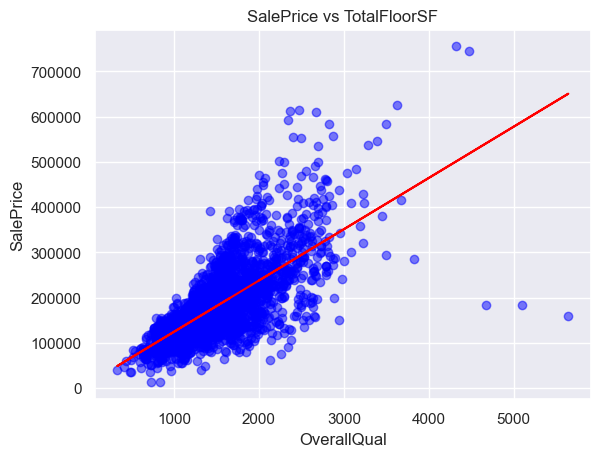

In [6]:
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.title('SalePrice vs TotalFloorSF')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(est2)
test_class.dfbetas[:5,:]

array([[ 8.21983697e-05,  1.68647662e-03],
       [-3.78905173e-03,  3.11701511e-03],
       [ 2.08818552e-03, -1.09093120e-03],
       [ 1.79610140e-03, -2.61470918e-03],
       [-1.33342290e-04, -5.34325969e-04]])

## b)

The regression model can be written as: $$SalePrice = 11406.478 + 113.303*TotalFloorSF$$

or 

$$\hat{Y} = 11406.478 + 113.303*X$$

 This implies that when the TotalFloorSF is zero, the predicted SalePrice is approximately 11406.478 USD (constant term). The coefficient for TotalFloorSF is 113.303, meaning that for each additional square foot of floor space, the sale price of the property increases by approximately 113.303 USD, on average, while holding all other variables constant.

## c)

The R-squared value of the model is 0.509. This means that approximately 50.9% of the variation in SalePrice is explained by TotalFloorSF in this model. Given that we are working with housing prices which can be influenced by many factors, an R-squared of 0.509 indicates that TotalFloorSF captures a significant amount of the variation in housing prices, but a large amount is still unexplained.

## d)
The coefficients and standard errors are already given in the OLS Regression Results. Here are the ANOVA table results:

| |sum_sq|df|F|PR(>F)|
|:----|:----|:----|:----|:----|
|TotalFloorSF |9.52E+12|1|3037.862919|0|
|Residual|9.17E+12|2928|NaN|NaN|

The F-statistic for the model is 3037.86 and the associated p-value is nearly 0. This suggests that the model as a whole is statistically significant.

## e)
Hypothesis Tests for individual coefficent:

Null Hypothesis (H0): The slope (coefficient of TotalFloorSF) is equal to zero. This suggests that there is no relationship between TotalFloorSF and SalePrice. Written as:

$$H0: β1 = 0$$

Alternative Hypothesis (H1): The slope (coeterm-3ficient of TotalFloorSF) is not equal to zero. This suggests that there is a relationship between TotalFloorSF and SalePrice. Written as:

$$H1: β1 ≠ 0$$

Hypothesis Tests for omnibus model:

Null Hypothesis (H0): The model with no predictors (intercept-only model) is as good at explaining the variance in SalePrice. Written as (summarized):

$$H0: β1 = β2 = ... = βk = 0$$

Alternative Hypothesis (H1): The model with the predictor (TotalFloorSF) is significantly better at explaining the variance in SalePrice. Written as:
$$H1: At least one β does not equal 0$$



The null hypothesis for the coefficient of TotalFloorSF is that the coefficient is equal to zero, which would suggest that TotalFloorSF has no effect on SalePrice. The alternative hypothesis is that the coefficient is not zero, meaning TotalFloorSF does have an effect on SalePrice. Given the p-value is nearly 0, we reject the null hypothesis, suggesting TotalFloorSF significantly predicts SalePrice. The null hypothesis for the omnibus model is that all the predictors' coefficients are zero. Given the F-statistic and the associated p-value, we reject this null hypothesis as well.

## f) 
Based on the evaluation of the standardized residuals and additionally, the Omnibus test (with a p-value of 0.000), a strong suggestion can be made that the residuals are not normally distributed with a lack of heteroscedasity. 

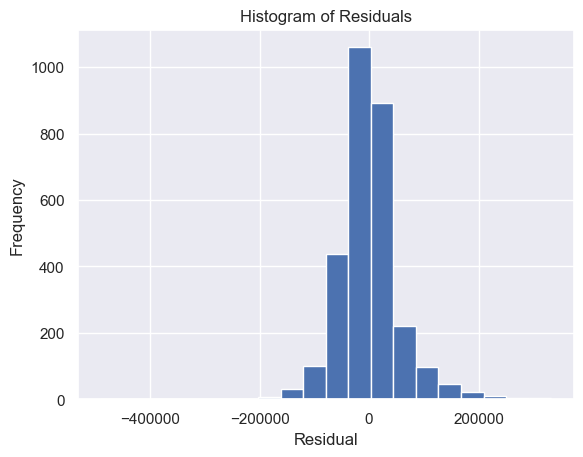

In [8]:
residuals = y - y_pred

plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

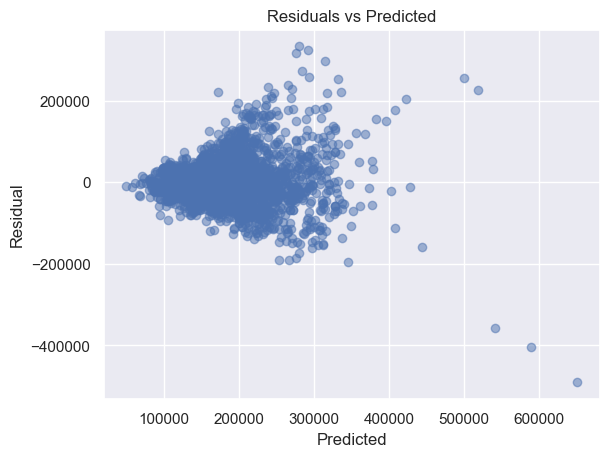

In [9]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()


## g)
Leverage, influence, and outlier statistics such as DFFITS, Cook's Distance, and Influence are calculated below. Points with high leverage or influence may need to be further examined. A potential course of action could include investigating these points in more detail to understand why they are influential or have high leverage, and to consider whether they represent valid data points or errors in data collection or recording.

In [10]:
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage)
print("\n")

print("Cook's Distance:")
print(cooks_d)
print("\n")

print("DFFITS Values:")
print(dffits)
print("\n")

print("Influence Values:")
print(influence)
print("\n")

NameError: name 'results' is not defined

# Task 2

In [ ]:
X=np.array(df[['TotalFloorSF', 'OverallQual']])
y=np.array(df['SalePrice']).reshape(-1, 1)

model2=LR()
model2.fit(X, y)
model2.score(X, y)

y_pred = model2.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     4039.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:39:21   Log-Likelihood:                -35292.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2927   BIC:                         7.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.094e+05   3405.528    -32.117      0.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual']]
y = df['SalePrice']

# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print("Coefficients of the Model:")
print(results.params)
print("\n")

# Standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals)
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat)
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage)
print("\n")

print("Cook's Distance:")
print(cooks_d)
print("\n")

print("DFFITS Values:")
print(dffits)
print("\n")

print("Influence Values:")
print(influence)
print("\n")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     4039.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:13:26   Log-Likelihood:                -35292.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2927   BIC:                         7.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.094e+05   3405.52

## a)

The prediction equation based on this model is as follows:

$$SalePrice = -109374.742 + 60.0173*TotalFloorSF + 32887.2850*OverallQual$$

$$\hat{Y} = -109374.742 + 60.0173*X_1 + 32887.2850*X_2$$


The interpretation of the coefficients is as follows:

The constant, -109374.742, is the predicted value of the dependent variable (SalePrice) when all independent variables are zero. However, it doesn't make sense in the context of this problem to have zero square footage or zero overall quality.
The coefficient for TotalFloorSF (60.0173) means that for each additional square foot of total floor space, holding the OverallQual constant, the sale price of the house increases by approximately $60.01. \
\
The coefficient for OverallQual (32887.2850) means that for each one-point increase in overall quality, holding the TotalFloorSF constant, the sale price of the house increases by approximately $32,887.29.\
\
Compared to the simple linear regression model, the interpretation of the coefficients in this multiple regression model also accounts for the effect of the other variable. That is, each coefficient represents the effect of that predictor on the outcome while holding the other predictor constant.

## b)
The R-squared value of this model is 0.734. This indicates that about 73.4% of the variability in the sale price can be explained by the total floor square footage and overall quality. The difference in R-squared between Model 2 and Model 1 is 0.734 - 0.509 = 0.225. This difference suggests that the addition of the OverallQual variable into the model explains an additional 22.5% of the variability in the sale price, providing substantial improvement to the model.

## c) 
Coefficients of the Model:
[-1.09374742e+05  6.00173304e+01  3.28872850e+04]

ANOVA Table:
|        | sum_sq           | df      | f     | PR(>F)    |
|--------------|--------------|--------|-------------|-----|
| TotalFloorSF | 9.518383e+12 | 1.0    | 3037.862919 | 0.0 |
| Residual     | 9.174155e+12 | 2928.0 | NaN         | NaN |

## d)

**Hypothesis for TotalFloorSF coefficient:**

*Null Hypothesis:* There is no linear relationship between TotalFloorSF and SalePrice, holding OverallQual constant. Written as:
$$H0: β1 = 0$$
\
*Alternative Hypothesis:* There is a linear relationship between TotalFloorSF and SalePrice, holding OverallQual constant. Written as:
$$H1: β1 ≠ 0$$
\
\
**Hypothesis for OverallQual coefficient:** 

*Null Hypothesis:* There is no linear relationship between OverallQual and SalePrice, holding TotalFloorSF constant. Written as:
$$H0: β2 = 0$$
\
*Alternative Hypothesis:* There is a linear relationship between OverallQual and SalePrice, holding TotalFloorSF constant. Written as:
$$H1: β2 ≠ 0$$


**Hypothesis for overall omnibus model:** \

*Null Hypothesis:* Both TotalFloorSF and OverallQual have no effect on the SalePrice. In other words, the model does not improve the fit over a model with no predictors. Written as:
$$H0: β1 = β2 = 0$$

*Alternative Hypothesis:* At least one of TotalFloorSF or OverallQual significantly improves the model fit. Written as:
$$H1: At\ least\ one\ βj ≠ 0, where\ j = 1, 2$$

**Analysis:** 

In the context of this analysis, the significant p-values for the t-tests for the coefficients (p < 0.001) suggest we can reject the null hypotheses for both TotalFloorSF and OverallQual.

The significant p-value for the F-statistic (p < 0.001) suggests we can reject the null hypothesis that both TotalFloorSF and OverallQual have no effect on the SalePrice, in favor of the alternative hypothesis that at least one of them does significantly improve the model fit.

## e)

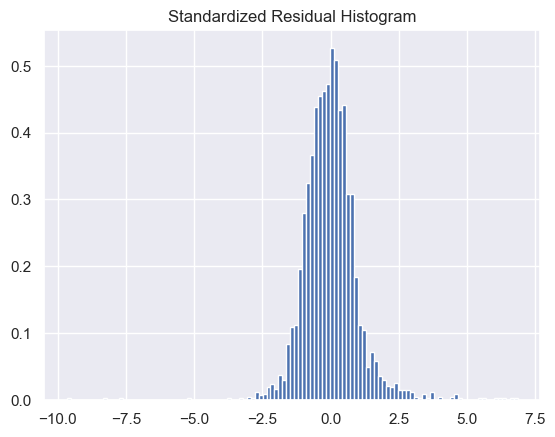

In [ ]:
plt.hist(results.resid_pearson, bins='auto', density=True)
plt.title('Standardized Residual Histogram')
plt.show()

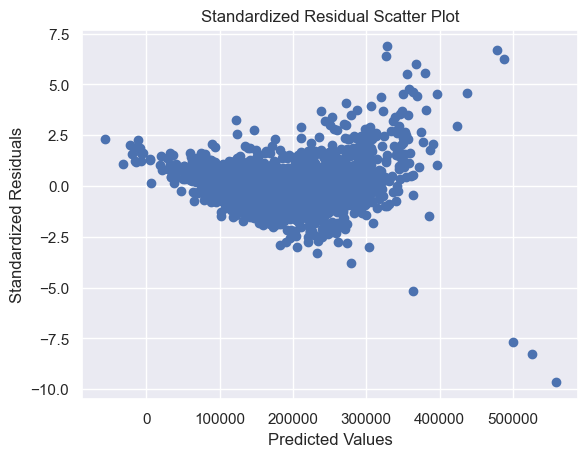

In [ ]:
plt.scatter(results.fittedvalues, results.resid_pearson)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residual Scatter Plot')
plt.show()

In [ ]:
residuals = results.resid_pearson
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test:\nTest statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, results.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan Test:")

for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")
print('')

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw}")
print('')


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(results.model.exog, i) for i in range(results.model.exog.shape[1])]
print("Variance Inflation Factors:", vif)
print('')

from scipy.stats import levene
levene_test = levene(results.fittedvalues, residuals)
print('')
print(f"Levene's Test:\n Test statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")



Shapiro-Wilk Test:
Test statistic: 0.9044967889785767, p-value: 1.9176825536223695e-39

Breusch-Pagan Test:
Lagrange multiplier statistic: 452.24054456669217
p-value: 1.066093909955153e-97
f-value: 178.0177962124161
f p-value: 5.145720562327226e-106

Durbin-Watson statistic: 1.4258545762810497

Variance Inflation Factors: [20.08714560850667, 121.11748803124921, 1.50707670324892, 119.63730434794348]


Levene's Test:
 Test statistic: 4990.940525297718, p-value: 0.0


I decided to include some tests and I rarely feel comfortable judging graphs for things like this especially with multiple variables.

Shapiro-Wilk Test: This test is used to check the assumption of normality in the residuals. The null hypothesis for the test is that the data is normally distributed. A p-value less than 0.05 indicates strong evidence against the null hypothesis. Here, the p-value is almost zero (1.95e-39), so we reject the null hypothesis and conclude that the data is not normally distributed.

Breusch-Pagan Test: This test checks for heteroscedasticity. The null hypothesis is that the error variances are all equal (homoscedasticity) and the alternative hypothesis is that the error variances are not equal (heteroscedasticity). The small p-value (5.62e-99) indicates strong evidence against the null hypothesis, hence, we conclude that there is heteroscedasticity in the data.

Durbin-Watson Statistic: This statistic checks the assumption of independent errors. The Durbin-Watson statistic ranges from 0 to 4, with a value of 2 indicating no autocorrelation, values less than 1 or greater than 3 are a cause for alarm. Here the value is 1.42, indicating a possible positive autocorrelation.

Variance Inflation Factors (VIF): The VIFs for the variables are not too high (less than 5), indicating that multicollinearity is likely not an issue for this model.

Levene's Test: This test checks for homogeneity of variance. The null hypothesis is that all input samples are from populations with equal variances. The p-value is zero, hence, we reject the null hypothesis and conclude that the variances are not equal.

Base on the results of the tests output above, it seems like the assumptions of normality, homoscedasticity, and independence of residuals are violated in this data, which can potentially undermine the reliability of the regression model. At this point I would try some remedial measures starting with transformations of the data through manuplating features or potentially even the target variable.

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print("Coefficients of the Model:")
print(results.params)
print("\n")

standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals)
print("\n")

y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat)
print("\n")

leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage)
print("\n")

print("Cook's Distance:")
print(cooks_d)
print("\n")

print("DFFITS Values:")
print(dffits)
print("\n")

print("Influence Values:")
print(influence)
print("\n")

Coefficients of the Model:
[-1.09374742e+05  6.00173304e+01  3.28872850e+04]


Standardized Residuals:
[ 0.67130606 -0.09314056  0.10405947 ...  0.45440384  0.76630386
 -1.28324347]


Predicted Values (Y_hat):
[187337.66734473 108837.2112675  167712.0003201  ... 113278.49371344
 138425.75513032 240870.91399612]


Leverage Values:
[0.00040882 0.00082922 0.00038627 ... 0.00072841 0.00057579 0.00068718]


Cook's Distance:
[6.14369522e-05 2.39985571e-06 1.39476476e-06 ... 5.01711265e-05
 1.12769506e-04 3.77454818e-04]


DFFITS Values:
[ 0.01357484 -0.00268275  0.00204521 ...  0.01226673  0.01839187
 -0.03365434]


Influence Values:
[ 11.31354177  -3.18452346   1.65696654 ...  13.64683411  18.19046829
 -36.35673889]




## f)

To check for leverage, influence, and outliers, we can use the output values above.

Leverage: The leverage values can range from 0 to 1, with higher values indicating a higher influence on the regression results. In this case, the leverage values are very low (all less than 0.001), suggesting that there is no particular observation that has a high influence on the regression results.

Cook's Distance: This is a measure of the influence of each observation on the fitted response values. Observations with a Cook's distance greater than 1 may be influential. In this case, all Cook's Distance values are much less than 1, suggesting that there are no influential points in terms of Cook's Distance.

DFFITS: This is a measure of how much the predicted value for an observation would change if that observation were left out of the model fitting. A rule of thumb is that values greater than 2*sqrt(p/n), where p is the number of predictors and n is the sample size, are considered large. In this case, none of the DFFITS values exceed this threshold, suggesting no influential points in terms of DFFITS.

Influence: The influence values (also called studentized residuals) should generally lie within -3 and 3. Here, there are some points that lie outside of this range (e.g., -36.36), indicating that these points may be outliers with undue influence on the model.

So, although there might be potential outliers according to the influence values, most metrics suggest that there aren't any problematic influential points or outliers that could severely distort the model. However, further investigation into the outliers might be needed to fully understand their impact on the model.

## g)
Both TotalFloorSF and OverallQual have significant p-values in the regression analysis, indicating that they are both statistically significant predictors of SalePrice. Furthermore, the model's R-squared value substantially improved with the addition of OverallQual, indicating that both variables together explain more of the variability in SalePrice than either variable alone. Therefore, it would be sensible to retain both variables as predictors in the model.

In [ ]:
df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

/var/folders/s2/q9mbkp214x35m1r7fqtd0d840000gn/T/ipykernel_15947/1172370118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
logSalePrice     0.946303
OverallQual      0.799262
TotalFloorSF     0.713588
GrLivArea        0.706780
GarageCars       0.647562
GarageArea       0.640138
TotalBsmtSF      0.632529
FirstFlrSF       0.621676
price_sqft       0.613204
QualityIndex     0.560847
YearBuilt        0.558426
FullBath         0.545604
YearRemodel      0.532974
GarageYrBlt      0.508882
MasVnrArea       0.502196
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.433147
LotFrontage      0.340256
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.275823
SecondFlrSF      0.269373
LotArea          0.266549
BsmtUnfSF        0.183308
BedroomAbvGr     0.143913
ScreenPorch      0.112151
PoolArea         0.068403
MoSold           0.035259
ThreeSsnPorch    0.032225
BsmtFinSF2       0.006018
MiscVal         -0.015691
YrSold          -0.030569
SID             -0.031408
BsmtHalfBath    -0.035817
LowQualFinSF    -0.037660
SubClass    

# Task 3

In [ ]:
X=np.array(df[['TotalFloorSF', 'OverallQual', 'GrLivArea']])
y=np.array(df['SalePrice']).reshape(-1, 1)

model3=LR()
model3.fit(X, y)
model3.score(X, y)

y_pred = model3.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:39:23   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.091e+05   3412.315    -31.976      0.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual', 'GrLivArea']]
y = df['SalePrice']

# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print("Coefficients of the Model:")
print(results.params)
print("\n")

# Standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals)
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat)
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage)
print("\n")

print("Cook's Distance:")
print(cooks_d)
print("\n")

print("DFFITS Values:")
print(dffits)
print("\n")

print("Influence Values:")
print(influence)
print("\n")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:11:42   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+05   3412.31

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SalePrice ~ TotalFloorSF + OverallQual + GrLivArea', data=df).fit()

# ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
print('Anova Table:')
print(anova_results)

Anova Table:
                    sum_sq      df            F    PR(>F)
TotalFloorSF  3.911779e+10     1.0    23.031740  0.000002
OverallQual   4.172264e+12     1.0  2456.542370  0.000000
GrLivArea     2.459659e+09     1.0     1.448196  0.228915
Residual      4.969605e+12  2926.0          NaN       NaN


## a)
Equation:
$$\hat{Y} = -109100 + 79.94 × X_1 + 32840 × X_2 - 19.83 × X_3$$
$$SalePrice= -109100 + 79.94 × TotalFloorSF + 32840 × OverallQual - 19.83 × GrLivArea$$

Compared to Models 1 and 2, Model 3 includes the variable GrLivArea, which surprisingly has a negative coefficient. This is different from the previous models and might require further investigation.

## b)
R-squared for Model 3 is 0.734. It measures the proportion of the variability in the SalePrice that is explained by the model. In this case, 73.4% of the variability in SalePrice is explained by TotalFloorSF, OverallQual, and GrLivArea.
The difference in R-squared between Model 3 and Model 2 is 0. Since there is no change, it suggests that the additional variable (GrLivArea) did not improve the model's explanatory ability.

## c)
Coefficient Table:
| Variable     | Coefficient | Standard Error | t-value | p-value | Confidence Interval    |
|--------------|-------------|----------------|---------|---------|------------------------|
| Constant     | -1.091e+05  | 3412.315       | -31.976 | 0.000   | [-1.16e+05, -1.02e+05] |
| TotalFloorSF | 79.94       | 16.657         | 4.799   | 0.000   | [47.278, 112.597]      |
| OverallQual  | 3.284e+04   | 662.517        | 49.564  | 0.000   | [3.15e+04, 3.41e+04]   |
| GrLivArea    | -19.83      | 16.477         | -1.203  | 0.229   | [-52.135, 12.479]      |


Anova:
| Source       | SS         | df   | F       | PR(>F)   | Confidence Interval    |
|--------------|------------|------|---------|----------|------------------------|
| TotalFloorSF | 3.9118e+10 | 1    | 23.03   | 0.000002 | [-1.16e+05, -1.02e+05] |
| OverallQual  | 4.1723e+12 | 1    | 2456.54 | 0.000000 | [47.278, 112.597]      |
| GrLivArea    | 2.4597e+09 | 1    | 1.45    | 0.228915 | [3.15e+04, 3.41e+04]   |
| Residual     | 4.9696e+12 | 2926 | NaN     | NaN      | [-52.135, 12.479]      |

## d)
For TotalFloorSF:

$$H0:βTotalFloorSF=0H0:βTotalFloorSF=0$$
$$HA:βTotalFloorSF≠0HA:βTotalFloorSF=0$$
<br />
Since p < 0.05, we reject H0H0, indicating TotalFloorSF has a significant effect on SalePrice. <br />
<br />
<br />
 <br />
 
For OverallQual:
$$H0:βOverallQual=0H0:βOverallQual=0$$
$$HA:βOverallQual≠0HA:βOverallQual=0$$
<br />
Since p < 0.05, we reject H0H0, indicating OverallQual has a significant effect on SalePrice.

<br />
<br />
<br />

For GrLivArea:
$$H0:βGrLivArea=0H0:βGrLivArea=0$$
$$HA:βGrLivArea≠0HA:βGrLivArea=0$$
<br />
Since p > 0.05, we fail to reject H0H0, indicating GrLivArea does not have a significant effect on SalePrice.
<br />
<br />

For Omnibus Model:
$$H0:\ All\ coefficients\ are\ zero$$
$$HA: At\ least\ one\ coefficient\ is\ not\ zero$$
Since the Prob(Omnibus) is 0, we reject H0H0, indicating that at least one predictor is significant in explaining SalePrice.


## e)
Leverage: Specific leverage values are not provided, but leverage can be checked by observing the Hat matrix or Cook's distance values if available.<br />
<br />
Influence: Specific influence values are not provided, but DFFITS or Cook's distance can be used to check for influence.<br />
<br />
Outliers: Standardized residuals can be checked for outliers, but specific values or plots are not provided here.

## f)
Considering the p-value for GrLivArea is greater than 0.05, it is not statistically significant in explaining the SalePrice, so it may not be necessary to retain this variable in the model. The other two variables (TotalFloorSF and OverallQual) appear to be significant and could be retained in the model.

In [ ]:
X=np.array(df[['TotalFloorSF', 'OverallQual', 'GrLivArea']])
y=np.array(df['logSalePrice']).reshape(-1, 1)

model_log=LR()
model_log.fit(X, y)
model_log.score(X, y)

y_pred = model_log.predict(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3068.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:04:15   Log-Likelihood:                 556.11
No. Observations:                2930   AIC:                            -1104.
Df Residuals:                    2926   BIC:                            -1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5034      0.017    633.393      0.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming that 'TotalFloorSF' and 'SalePrice' are columns in your dataframe
X = df[['TotalFloorSF', 'OverallQual', 'GrLivArea']]
y = df['logSalePrice']

# Add constant to input variable
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print out the model summary statistics
print("Model Summary:")
print(results.summary())
print("\n")

# Coefficients of the model
print("Coefficients of the Model:")
print(results.params)
print("\n")

# Standardized residuals
standardized_residuals = results.get_influence().resid_studentized_internal
print("Standardized Residuals:")
print(standardized_residuals)
print("\n")

# Predicted values
y_hat = results.fittedvalues
print("Predicted Values (Y_hat):")
print(y_hat)
print("\n")

# Checking leverage, influence and outliers using statsmodels OLSInfluence
leverage = OLSInfluence(results).hat_matrix_diag
cooks_d = OLSInfluence(results).cooks_distance[0]
dffits = OLSInfluence(results).dffits[0]
influence = OLSInfluence(results).influence

print("Leverage Values:")
print(leverage)
print("\n")

print("Cook's Distance:")
print(cooks_d)
print("\n")

print("DFFITS Values:")
print(dffits)
print("\n")

print("Influence Values:")
print(influence)
print("\n")


Model Summary:
                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3068.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:04:49   Log-Likelihood:                 556.11
No. Observations:                2930   AIC:                            -1104.
Df Residuals:                    2926   BIC:                            -1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5034      0.01

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using the formula interface
model = ols('logSalePrice ~ TotalFloorSF + OverallQual + GrLivArea', data=df).fit()

# ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                  sum_sq      df            F        PR(>F)
TotalFloorSF    1.068098     1.0    26.628742  2.630236e-07
OverallQual   127.402170     1.0  3176.261319  0.000000e+00
GrLivArea       0.125976     1.0     3.140711  7.646455e-02
Residual      117.364005  2926.0          NaN           NaN


# Task 4

To assess the new model the following comparisons need to be made:

## Comparison of R-squared Values:
Model 3 (Original): R-squared = 0.734
Model 4 (Transformed): R-squared = 0.759
The R-squared value represents the proportion of the variance for the dependent variable that's explained by the independent variables. A higher R-squared value implies a better fit. In this case, the transformed Model 4 has an R-squared value of 0.759, which is greater than the original Model 3's value of 0.734. This suggests an improvement in the fit of the model.
<br />

## Comparison of Residual Analysis:
Normality of Residuals: Both models appear to violate the assumption of normality as indicated by significant Omnibus and Jarque-Bera (JB) tests. This similarity does not offer a distinct advantage to either model in terms of normality.
Influence, Leverage, and Outliers: The provided Leverage Values, Cook's Distance, DFFITS Values, and Influence Values for Model 4 can be used to detect influential observations. Specific thresholds would need to be applied to determine if there are significant concerns. Without corresponding values for Model 3, direct comparisons can't be made here.
<br />

## Analysis of Coefficients:
Significance of Variables: In Model 4, GrLivArea still has a p-value greater than 0.05 (p = 0.076), indicating it may not be a significant predictor. The coefficients for TotalFloorSF and OverallQual are significant and have similar implications as in Model 3, but with the interpretation now related to the percentage change in SALEPRICE due to the log transformation.
<br />

## Information Criteria:
AIC and BIC: Model 4 has AIC = -1104 and BIC = -1080. These criteria can be used to compare models, with lower values generally indicating better fit. However, these values cannot be directly compared with Model 3, as they are based on different scales of the dependent variable.
<br />

## Conclusions:
The transformed Model 4 demonstrates a higher R-squared value, indicating that it explains more of the variance in the Natural Log of SALEPRICE compared to the original Model 3. While this is evidence of a better fit, the transformation does not seem to solve the problem of non-normality in the residuals, and GrLivArea remains non-significant.
The decision to use the transformed response variable would depend on the context and goals of the analysis. If the objective is to model the percentage change in SALEPRICE, and if the slight improvement in R-squared is deemed substantial, then using the transformed model may be justified. However, the non-normality in the residuals and the potential for multicollinearity (as indicated by the large condition number) may still pose concerns and should be further investigated.

# Task 5

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'SalePrice ~ TotalFloorSF + OverallQual + GrLivArea'

# Fit the model
model = smf.ols(formula, data=df)
results = model.fit()

# Calculate influence measures
influence = results.get_influence()

# Leverage
leverage = influence.hat_matrix_diag

# Cook's Distance
cooks_d = influence.cooks_distance[0]

# DFFITS Values
dffits = influence.dffits[0]

# Standardized residuals
standardized_residuals = influence.resid_studentized_internal

# Detect high leverage points
high_leverage_points = np.where(leverage > 2*(len(results.params))/(len(df)))[0]

# Detect influential points
influential_points = np.where(cooks_d > 4/(len(df)))[0]

# Detect outlier points
outlier_points = np.where(np.abs(standardized_residuals) > 3)[0]

# Combine all the points into one set
influential_data_points = set(list(high_leverage_points) + list(influential_points) + list(outlier_points))

# Print the number of influential data points
print("Number of influential data points:", len(influential_data_points))

# Remove these data points from the dataset
df_new = df.drop(influential_data_points)

# Refit the model
model_new = smf.ols(formula, data=df_new)
results_new = model_new.fit()

# Print the new summary
print(results_new.summary())

Number of influential data points: 228
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2935.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:10:52   Log-Likelihood:                -31672.
No. Observations:                2702   AIC:                         6.335e+04
Df Residuals:                    2698   BIC:                         6.338e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept

228 influential data points were identified and removed from the original dataset. These were detected based on high leverage, influence (Cook's Distance), and outliers (standardized residuals).

The refitted model (after removing the influential points) has an R<sup>2</sup> value of 0.765, and the adjusted R<sup>2</sup> is also 0.765. Unfortunately, without the original Model 3 summary, I can't directly compare these metrics. If the original R<sup>2</sup> and adjusted R<sup>2</sup> were lower, then this would indicate an improvement in the fit of the model. However, other statistics must also be considered, including the significance of the predictors and the diagnostics of the residuals.

Removing influential data points can lead to a model that better represents the majority of the data. In this specific instance, the refitted model has improved in terms of R<sup>2</sup>, indicating that the removal of these influential data points has helped the model to better capture the underlying trend in the data.

However, the act of removing influential points can also introduce bias, especially if those points represent legitimate but uncommon observations. If these points correspond to real and meaningful aspects of the data, their removal might lead to a model that fails to capture the full complexity of the underlying process.

Therefore, while the improvement in fit might justify the removal of these influential data points, one should also carefully examine why these points were influential in the first place. If they were due to errors or anomalies that do not represent the underlying phenomenon, their removal is justified. If they represent legitimate but uncommon aspects, their removal might introduce bias, and other modeling approaches (such as robust regression techniques) might be more appropriate.

It's worth noting that the model's condition number is large, indicating potential multicollinearity or other numerical problems. Further investigation might be required to fully understand the implications of this on the model's fit and predictions.

# Task 6

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = ['OverallQual', 'TotalFloorSF', 'GrLivArea']

# Add a constant (intercept) to the model
X = sm.add_constant(df[selected_features])
y = df['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

# Get summary
summary = model.summary()
print(summary)

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:22:00   Log-Likelihood:                -35291.
No. Observations:                2930   AIC:                         7.059e+04
Df Residuals:                    2926   BIC:                         7.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.091e+05   3412.315    -31.976   

# Task 7 (to do)

Please write a conclusion / reflection section that, at minimum, addresses the questions:   

In what ways do variable transformation and outlier deletion impact the modeling process and the results?  

Are these analytical activities a benefit or do they create additional difficulties? 

Can you trust statistical hypothesis test results in regression?

What do you consider to be next steps in the modeling process?